In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
df.isna().sum().sum()

print(f'There {df.isna().sum().sum()} Missing Values in the dataset')

There 0 Missing Values in the dataset


C:\Users\PC\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


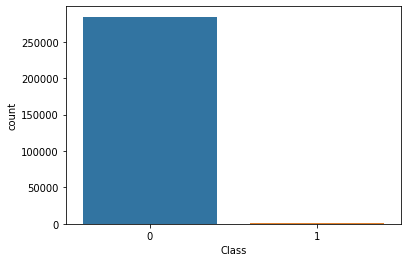

In [5]:
sns.countplot(df["Class"]);

In [6]:
from sklearn.preprocessing import RobustScaler

rob_scale = RobustScaler()

df['scaled_amount']=rob_scale.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_Time']=rob_scale.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Amount','Time'], axis=1,inplace=True)

In [7]:
legit = df[df["Class"] == 0]
fraud = df[df["Class"] == 1]


print(f'Legit: {fraud.Class.value_counts()[1]} & Fraud : {legit.Class.value_counts()[0]}')

Legit: 492 & Fraud : 284315


In [8]:
ls = legit.sample(n=492)
ls.Class.value_counts()

0    492
Name: Class, dtype: int64

In [9]:
df2 = pd.concat([fraud,ls], axis = 0)
df2.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_Time
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.307413,-0.990214
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,7.084469,-0.989438
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,3.045204,-0.942563
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,0.517013,-0.912910
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.293440,-0.906648
6331,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,-6.187891,...,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1,-0.293440,-0.906566
6334,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,-6.045468,...,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1,-0.293440,-0.906460
6336,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,-5.134454,...,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1,-0.293440,-0.906366
6338,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,-4.959493,...,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1,-0.293440,-0.906272
6427,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,-4.624985,...,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1,-0.293440,-0.905579


C:\Users\PC\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


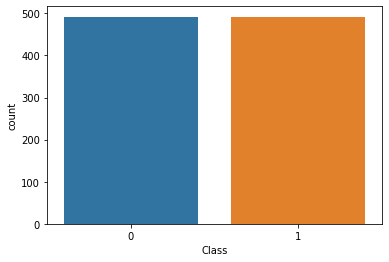

In [10]:
sns.countplot(df2["Class"]);

Data Spliting

In [11]:
#spliting the data for target and features
X = df2.drop(columns='Class', axis=1)
y = df2.Class

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.3)
x_train1,x_test1,y_train1,y_test1 = train_test_split(X, y, test_size=0.4)
x_train2,x_test2,y_train2,y_test2 = train_test_split(X, y, test_size=0.5)
x_train3,x_test3,y_train3,y_test3 = train_test_split(X, y, test_size=0.2)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rn = RandomForestClassifier(n_estimators=100)
rn1 = RandomForestClassifier(n_estimators=100)
rn2 = RandomForestClassifier(n_estimators=100)
rn3 = RandomForestClassifier(n_estimators=100)

In [16]:
rn.fit(x_train,y_train)
rn1.fit(x_train1,y_train1)
rn2.fit(x_train2,y_train2)
rn3.fit(x_train3,y_train3)

RandomForestClassifier()

In [17]:
pred = rn.predict(x_test)
pred1 = rn1.predict(x_test1)
pred2 = rn2.predict(x_test2)
pred3 = rn3.predict(x_test3)

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       164
           1       0.95      0.91      0.93       132

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



In [20]:
print(classification_report(y_test1, pred1))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       194
           1       0.97      0.91      0.94       200

    accuracy                           0.94       394
   macro avg       0.94      0.94      0.94       394
weighted avg       0.94      0.94      0.94       394



In [21]:
print(classification_report(y_test2, pred2))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       245
           1       0.97      0.92      0.94       247

    accuracy                           0.94       492
   macro avg       0.94      0.94      0.94       492
weighted avg       0.94      0.94      0.94       492



In [22]:
print(classification_report(y_test3, pred3))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        94
           1       1.00      0.88      0.94       103

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



In [23]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

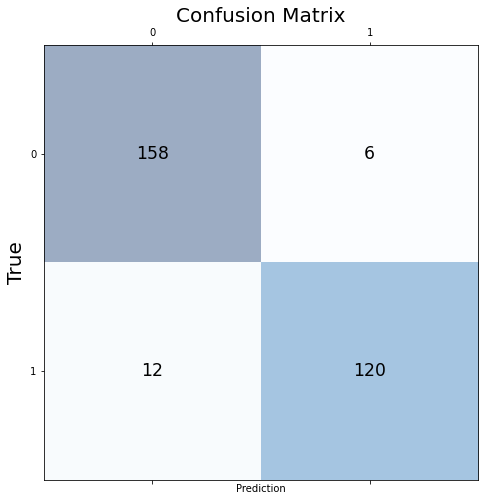

In [24]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]): 
        ax.text(x=j, y=i,s=conf_matrix[i, j],va='center',ha='center',size='xx-large')
plt.xlabel('Prediction',fontsize=10)
plt.ylabel('True',fontsize=20)
plt.title('Confusion Matrix', fontsize=20)
plt.show()

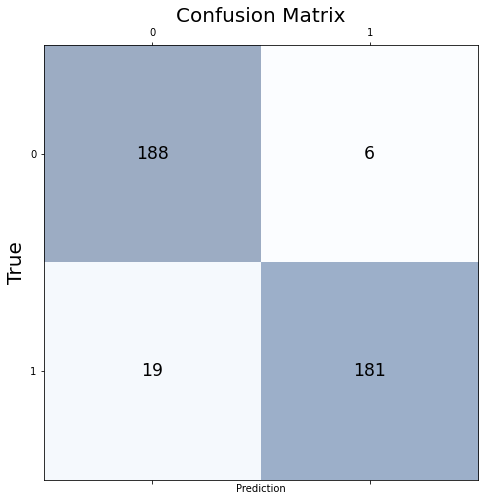

In [25]:
conf_matrix = confusion_matrix(y_true=y_test1, y_pred=pred1)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]): 
        ax.text(x=j, y=i,s=conf_matrix[i, j],va='center',ha='center',size='xx-large')
plt.xlabel('Prediction',fontsize=10)
plt.ylabel('True',fontsize=20)
plt.title('Confusion Matrix', fontsize=20)
plt.show()

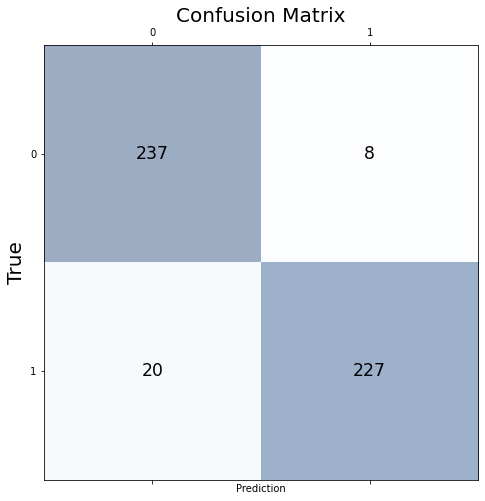

In [26]:
conf_matrix = confusion_matrix(y_true=y_test2, y_pred=pred2)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]): 
        ax.text(x=j, y=i,s=conf_matrix[i, j],va='center',ha='center',size='xx-large')
plt.xlabel('Prediction',fontsize=10)
plt.ylabel('True',fontsize=20)
plt.title('Confusion Matrix', fontsize=20)
plt.show()

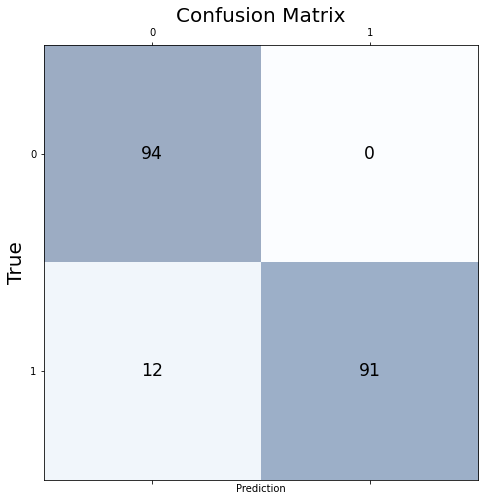

In [27]:
conf_matrix = confusion_matrix(y_true=y_test3, y_pred=pred3)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]): 
        ax.text(x=j, y=i,s=conf_matrix[i, j],va='center',ha='center',size='xx-large')
plt.xlabel('Prediction',fontsize=10)
plt.ylabel('True',fontsize=20)
plt.title('Confusion Matrix', fontsize=20)
plt.show()

In [28]:
#Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)
final_pred1 = svm.predict(x_test)

TESTING WITH DEEP LEARNING ALGORITHMS USING OVERSAMPLED DATA

In [29]:
print(classification_report(y_test, final_pred1))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       164
           1       0.98      0.91      0.94       132

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



In [30]:
#spliting the data for target and features
X1 = df.drop(columns='Class', axis=1)
y1 = df.Class

In [31]:
#Solving the problem of imbalnce with oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_sampled, Y_sampled = ros.fit_resample(X1, y1)
from collections import Counter
print(sorted(Counter(Y_sampled).items()))

[(0, 284315), (1, 284315)]


In [32]:
x_train,x_test,y_train,y_test = train_test_split(X_sampled, Y_sampled, test_size=0.3)

In [33]:
# for RNN
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import LSTM, Dense, Embedding, Dropout,Input, Activation
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras import backend as K, regularizers, Model, metrics
from keras.backend import cast

In [34]:
rnn_train_x = x_train.values.reshape(-1, 1, 30)
rnn_test_x = x_test.values.reshape(-1, 1, 30)

In [35]:
rnn_train_x.shape

(398041, 1, 30)

In [36]:
y_train.shape

(398041,)

In [37]:
input_shape=Input((1,30))
layer_1=LSTM(50,dropout=0.3,recurrent_dropout=0.2, return_sequences=True)(input_shape)
layer_2=LSTM(50,dropout=0.3,recurrent_dropout=0.2)(layer_1)
output=Dense(1,activation='sigmoid')(layer_2)
model=Model(input_shape,output)

In [38]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
history=model.fit(rnn_train_x , y_train,epochs=10,batch_size=2000, validation_data=(rnn_test_x , y_test))

Epoch 1/10
200/200 [==============================] - 20s 47ms/step - loss: 0.2919 - accuracy: 0.9007 - val_loss: 0.1108 - val_accuracy: 0.9567
Epoch 2/10
200/200 [==============================] - 8s 42ms/step - loss: 0.1166 - accuracy: 0.9537 - val_loss: 0.0745 - val_accuracy: 0.9680
Epoch 3/10
200/200 [==============================] - 8s 41ms/step - loss: 0.0949 - accuracy: 0.9608 - val_loss: 0.0571 - val_accuracy: 0.9744
Epoch 4/10
200/200 [==============================] - 8s 42ms/step - loss: 0.0833 - accuracy: 0.9652 - val_loss: 0.0469 - val_accuracy: 0.9803
Epoch 5/10
200/200 [==============================] - 8s 40ms/step - loss: 0.0752 - accuracy: 0.9685 - val_loss: 0.0403 - val_accuracy: 0.9831
Epoch 6/10
200/200 [==============================] - 8s 41ms/step - loss: 0.0694 - accuracy: 0.9710 - val_loss: 0.0350 - val_accuracy: 0.9865
Epoch 7/10
200/200 [==============================] - 8s 40ms/step - loss: 0.0637 - accuracy: 0.9737 - val_loss: 0.0315 - val_accuracy: 0.986

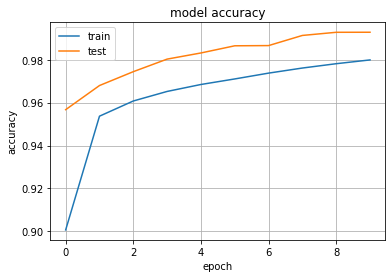

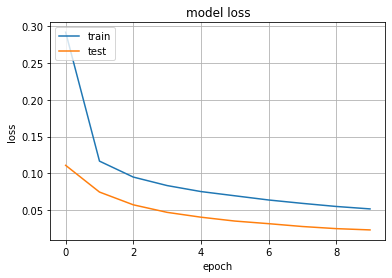

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.savefig("accuracy.png")
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.savefig("loss.png")
plt.show()

In [41]:
rnn_pred = model.predict(rnn_test_x)

In [42]:
for i in range(len(rnn_pred)):
    if rnn_pred[i]>0.5:
        rnn_pred[i]=1
    elif rnn_pred[i]<=0.5:
        rnn_pred[i]=0

In [43]:
print(classification_report(y_test, rnn_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85176
           1       0.99      1.00      0.99     85413

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



FOR CNN

In [44]:
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier

In [45]:
input_dim = x_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(20, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(10,  activation='tanh'))
model.add(layers.Dense(1024, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [46]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              11264     
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1025      
Total params: 17,215
Trainable params: 15,167
Non-trainable params: 2,048
________________________________________________

In [47]:
history = model.fit(x_train,y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(x_test, y_test),
                    batch_size=2000)


Epoch 1/10
200/200 [==============================] - 21s 99ms/step - loss: 0.1197 - accuracy: 0.9517 - val_loss: 0.3136 - val_accuracy: 0.9374
Epoch 2/10
200/200 [==============================] - 20s 99ms/step - loss: 0.0353 - accuracy: 0.9888 - val_loss: 0.0776 - val_accuracy: 0.9624
Epoch 3/10
200/200 [==============================] - 20s 98ms/step - loss: 0.0200 - accuracy: 0.9947 - val_loss: 0.0282 - val_accuracy: 0.9945
Epoch 4/10
200/200 [==============================] - 19s 96ms/step - loss: 0.0145 - accuracy: 0.9964 - val_loss: 0.0123 - val_accuracy: 0.9983
Epoch 5/10
200/200 [==============================] - 19s 96ms/step - loss: 0.0127 - accuracy: 0.9969 - val_loss: 0.0111 - val_accuracy: 0.9978
Epoch 6/10
200/200 [==============================] - 19s 95ms/step - loss: 0.0098 - accuracy: 0.9978 - val_loss: 0.0088 - val_accuracy: 0.9979
Epoch 7/10
200/200 [==============================] - 19s 97ms/step - loss: 0.0090 - accuracy: 0.9979 - val_loss: 0.0065 - val_accuracy:

In [48]:
cnn_pred = model.predict(x_test)

In [49]:
for i in range(len(cnn_pred)):
    if cnn_pred[i]>0.5:
        cnn_pred[i]=1
    elif cnn_pred[i]<=0.5:
        cnn_pred[i]=0

In [50]:
print(classification_report(y_test, cnn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85176
           1       1.00      1.00      1.00     85413

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

